# PREDICTING VANCOUVER WEATHER PROPOSAL

## Introduction 

The dataset we are using for our analysis is the daily weather data recorded in Vancouver (on visualcrossing.com) between 31st December 2017, and 31st December 2022. This dataset contains information such as the daily temperature, humidity levels, windspeed, precipitation cover and so on. It also includes the daily simple weather type in the form of picking an icon to show whether it is a clear day, raining, snowing, and so on. Vancouver is known for raining a lot throughout the year, but there are still many days where there is no precipitation or where the precipitation is something different. We have decided to use this dataset to reasonably predict the weather type on any given day based on other meteorological factors. Therefore our question is, what is the type of weather expected on a certain day in Vancouver, given only the temperature, humidity, pressure, cloud cover, sea level pressure, and wind speed?


Reference: https://www.visualcrossing.com/

## Methods
We will use the temperature (Celsius), feels-like temperature (Celsius), humidity (g/m^3), cloud cover (%), sea level pressure, and the wind speed (km/h) in order to determine the expected weather. Before working with the actual data, we are planning to predict the weather type by using common sense. For example, when the temperature is high, the expected precipitation is likely going to be on the lower side. Higher wind speed would indicate the higher precipitation rate. Then, we will use the functions and code that we learned from classification lessons to determine the actual weather type for specific days in Vancouver. We are planning to create several different scatterplots with different y-axis: temperature, humidity, cloud cover, sea level pressure, and wind speed. The date will be the x-axis and we will categorize each point as its weather type for all graphs.


## Preliminary exploratory data analysis

In [1]:
library(repr)
library(tidyverse)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
# read data from url into variable
weather_data <- read_csv("https://raw.githubusercontent.com/DaffyDiamond/DSCI-100-Group-30/main/data/vancouver_hourly.csv")
weather_data



Rows: 17544 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (5): name, preciptype, conditions, icon, stations
dbl  (18): temp, feelslike, dew, humidity, precip, precipprob, snow, snowdep...
dttm  (1): datetime

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


name      datetime            temp feelslike dew humidity precip
1     vancouver 2020-12-31 00:00:00 5.9  3.0       5.3 95.97     1.376
2     vancouver 2020-12-31 01:00:00 5.7  2.9       5.0 95.13     0.191
3     vancouver 2020-12-31 02:00:00 5.8  3.5       4.9 93.72     0.606
4     vancouver 2020-12-31 03:00:00 5.7  3.7       4.8 94.11     0.108
5     vancouver 2020-12-31 04:00:00 5.5  3.5       5.1 96.73     2.166
6     vancouver 2020-12-31 05:00:00 5.5  5.5       4.8 95.33     0.017
7     vancouver 2020-12-31 06:00:00 5.5  5.5       4.9 95.60     0.000
8     vancouver 2020-12-31 07:00:00 5.0  5.0       4.5 97.06     0.000
9     vancouver 2020-12-31 08:00:00 5.4  5.4       4.8 96.23     0.014
10    vancouver 2020-12-31 09:00:00 5.3  5.3       5.2 99.15     0.011
11    vancouver 2020-12-31 10:00:00 6.1  6.1       5.5 95.78     0.467
12    vancouver 2020-12-31 11:00:00 6.6  6.6       5.6 93.27     0.047
13    vancouver 2020-12-31 12:00:00 7.0  7.0       5.8 91.64     0.000
14    vancouver 2020-12-31 13:00:00 6.7  6.7       6.0 95.23     0.000
15    vancouver 2020-12-31 14:00:00 6.5  5.1       6.4 99.87     0.000
16    vancouver 2020-12-31 15:00:00 6.7  6.0       6.3 97.24     0.033
17    vancouver 2020-12-31 16:00:00 6.4  4.9       6.0 97.25    15.571
18    vancouver 2020-12-31 17:00:00 6.5  5.0       5.8 95.35     0.000
19    vancouver 2020-12-31 18:00:00 6.5  4.7       5.7 94.68     0.000
20    vancouver 2020-12-31 19:00:00 6.4  5.0       6.0 97.05     0.171
21    vancouver 2020-12-31 20:00:00 6.7  5.6       6.0 95.33     0.040
22    vancouver 2020-12-31 21:00:00 6.7  5.2       6.3 97.29     0.259
23    vancouver 2020-12-31 22:00:00 6.7  4.9       6.3 97.32     0.638
24    vancouver 2020-12-31 23:00:00 6.8  5.5       6.5 98.01     1.185
25    vancouver 2021-01-01 00:00:00 6.8  5.2       6.4 97.60     1.377
26    vancouver 2021-01-01 01:00:00 7.0  4.1       6.5 96.59     0.484
27    vancouver 2021-01-01 02:00:00 7.2  4.8       6.4 94.13     0.473
28    vancouver 2021-01-01 03:00:00 7.3  4.5       6.5 94.64     0.775
29    vancouver 2021-01-01 04:00:00 7.1  4.0       6.2 93.99     3.893
30    vancouver 2021-01-01 05:00:00 7.2  4.5       6.4 94.80     1.615
⋮     ⋮         ⋮                   ⋮    ⋮         ⋮   ⋮        ⋮     
17515 vancouver 2022-12-30 18:00:00 8.0  6.2       5.7 84.99    0.060 
17516 vancouver 2022-12-30 19:00:00 7.8  5.7       6.1 88.66    0.013 
17517 vancouver 2022-12-30 20:00:00 7.5  6.2       6.5 93.22    0.807 
17518 vancouver 2022-12-30 21:00:00 7.5  5.7       6.8 94.80    1.143 
17519 vancouver 2022-12-30 22:00:00 7.5  5.0       6.8 95.14    0.325 
17520 vancouver 2022-12-30 23:00:00 7.7  5.6       6.7 93.71    0.748 
17521 vancouver 2022-12-31 00:00:00 7.9  6.0       6.7 92.30    0.800 
17522 vancouver 2022-12-31 01:00:00 7.6  6.0       6.6 93.58    0.034 
17523 vancouver 2022-12-31 02:00:00 7.5  6.7       6.5 93.65    0.592 
17524 vancouver 2022-12-31 03:00:00 7.0  5.3       6.5 96.18    0.382 
17525 vancouver 2022-12-31 04:00:00 6.5  5.6       5.9 95.83    2.484 
17526 vancouver 2022-12-31 05:00:00 6.3  6.3       5.8 96.46    0.000 
17527 vancouver 2022-12-31 06:00:00 6.2  6.2       5.8 97.55    0.000 
17528 vancouver 2022-12-31 07:00:00 6.0  6.0       5.5 96.25    0.000 
17529 vancouver 2022-12-31 08:00:00 5.8  5.1       5.3 96.51    0.000 
17530 vancouver 2022-12-31 09:00:00 6.2  5.5       5.7 96.58    0.000 
17531 vancouver 2022-12-31 10:00:00 6.9  6.2       6.2 95.49    0.054 
17532 vancouver 2022-12-31 11:00:00 7.2  5.2       6.2 93.19    0.000 
17533 vancouver 2022-12-31 12:00:00 6.9  5.4       6.7 99.06    0.000 
17534 vancouver 2022-12-31 13:00:00 7.5  7.5       6.4 92.34    0.000 
17535 vancouver 2022-12-31 14:00:00 8.3  8.3       6.9 91.29    0.000 
17536 vancouver 2022-12-31 15:00:00 8.1  8.1       5.7 84.99    0.000 
17537 vancouver 2022-12-31 16:00:00 7.7  7.7       6.7 93.55    6.505 
17538 vancouver 2022-12-31 17:00:00 6.9  6.9       6.0 93.74    0.000 
17539 vancouver 2022-12-31 18:

In [3]:
# selected out variables that are irrelivant to our predictions
weather_cleaned <- weather_data |>
    select(datetime, temp, feelslike, humidity, sealevelpressure, windspeed, cloudcover, icon) |>
    rename(weather = icon) |>
# wind has been filtered out due to being statistically insignificant
    filter(!(weather == "wind"))

weather_cleaned

datetime            temp feelslike humidity sealevelpressure windspeed
1     2020-12-31 00:00:00 5.9  3.0       95.97    1005.7           14.3     
2     2020-12-31 01:00:00 5.7  2.9       95.13    1006.3           13.4     
3     2020-12-31 02:00:00 5.8  3.5       93.72    1007.4           10.7     
4     2020-12-31 03:00:00 5.7  3.7       94.11    1008.5            9.3     
5     2020-12-31 04:00:00 5.5  3.5       96.73    1009.6            9.2     
6     2020-12-31 05:00:00 5.5  5.5       95.33    1011.0            3.4     
7     2020-12-31 06:00:00 5.5  5.5       95.60    1012.2            1.5     
8     2020-12-31 07:00:00 5.0  5.0       97.06    1013.1            1.7     
9     2020-12-31 08:00:00 5.4  5.4       96.23    1014.4            3.9     
10    2020-12-31 09:00:00 5.3  5.3       99.15    1015.4            1.0     
11    2020-12-31 10:00:00 6.1  6.1       95.78    1016.8            2.7     
12    2020-12-31 11:00:00 6.6  6.6       93.27    1017.3            3.5     
13    2020-12-31 12:00:00 7.0  7.0       91.64    1017.6            2.4     
14    2020-12-31 13:00:00 6.7  6.7       95.23    1018.0            3.6     
15    2020-12-31 14:00:00 6.5  5.1       99.87    1017.9            7.0     
16    2020-12-31 15:00:00 6.7  6.0       97.24    1018.8            5.3     
17    2020-12-31 16:00:00 6.4  4.9       97.25    1018.6            7.3     
18    2020-12-31 17:00:00 6.5  5.0       95.35    1018.7            7.5     
19    2020-12-31 18:00:00 6.5  4.7       94.68    1018.8            9.0     
20    2020-12-31 19:00:00 6.4  5.0       97.05    1018.8            7.1     
21    2020-12-31 20:00:00 6.7  5.6       95.33    1018.7            6.4     
22    2020-12-31 21:00:00 6.7  5.2       97.29    1018.1            7.9     
23    2020-12-31 22:00:00 6.7  4.9       97.32    1017.8            8.9     
24    2020-12-31 23:00:00 6.8  5.5       98.01    1017.6            7.1     
25    2021-01-01 00:00:00 6.8  5.2       97.60    1016.9            8.1     
26    2021-01-01 01:00:00 7.0  4.1       96.59    1015.9           15.6     
27    2021-01-01 02:00:00 7.2  4.8       94.13    1014.8           13.4     
28    2021-01-01 03:00:00 7.3  4.5       94.64    1013.7           15.2     
29    2021-01-01 04:00:00 7.1  4.0       93.99    1012.9           18.2     
30    2021-01-01 05:00:00 7.2  4.5       94.80    1012.0           14.6     
⋮     ⋮                   ⋮    ⋮         ⋮        ⋮                ⋮        
17509 2022-12-30 18:00:00 8.0  6.2       84.99     998.3           10.7     
17510 2022-12-30 19:00:00 7.8  5.7       88.66     998.3           11.7     
17511 2022-12-30 20:00:00 7.5  6.2       93.22     998.6            7.5     
17512 2022-12-30 21:00:00 7.5  5.7       94.80     998.9           10.3     
17513 2022-12-30 22:00:00 7.5  5.0       95.14     999.3           14.0     
17514 2022-12-30 23:00:00 7.7  5.6       93.71     999.9           11.1     
17515 2022-12-31 00:00:00 7.9  6.0       92.30    1000.6           10.4     
17516 2022-12-31 01:00:00 7.6  6.0       93.58    1000.9            8.7     
17517 2022-12-31 02:00:00 7.5  6.7       93.65    1001.5            5.6     
17518 2022-12-31 03:00:00 7.0  5.3       96.18    1002.4            9.1     
17519 2022-12-31 04:00:00 6.5  5.6       95.83    1003.1            5.8     
17520 2022-12-31 05:00:00 6.3  6.3       96.46    1003.8            3.8     
17521 2022-12-31 06:00:00 6.2  6.2       97.55    1004.8            2.8     
17522 2022-12-31 07:00:00 6.0  6.0       96.25    1005.7            4.4     
17523 2022-12-31 08:00:00 5.8  5.1       96.51    1006.5            4.9     
17524 2022-12-31 09:00:00 6.2  5.5       96.58    1007.4            5.0     
17525 2022-12-31 10:00:00 6.9  6.2       95.49    1008.5            5.0     
17526 2022-12-31 11:00:00 7.2  5.2       93.19    1009.0           10.8     
17527 2022-12-31 12:00:00 6.9  5.4       99.06    1009.3            7.8     
17528 2022-12-31 13:00:00 7.5  7.5       92.34    1009.5            2.7     
17

In [4]:
# split data into training and testing sets
set.seed(1234)

weather_split <- initial_split(weather_cleaned, prop = 0.75, strata = weather)
weather_training <- training(weather_split)
weather_testing <- testing(weather_split)


In [5]:
# summarize table
weather_amount <- weather_training |>
    group_by(weather) |>
    summarize(n())
weather_amount

weather             n() 
1 clear-day            908
2 clear-night         1190
3 cloudy              2834
4 partly-cloudy-day   2890
5 partly-cloudy-night 2218
6 rain                2879
7 snow                 233

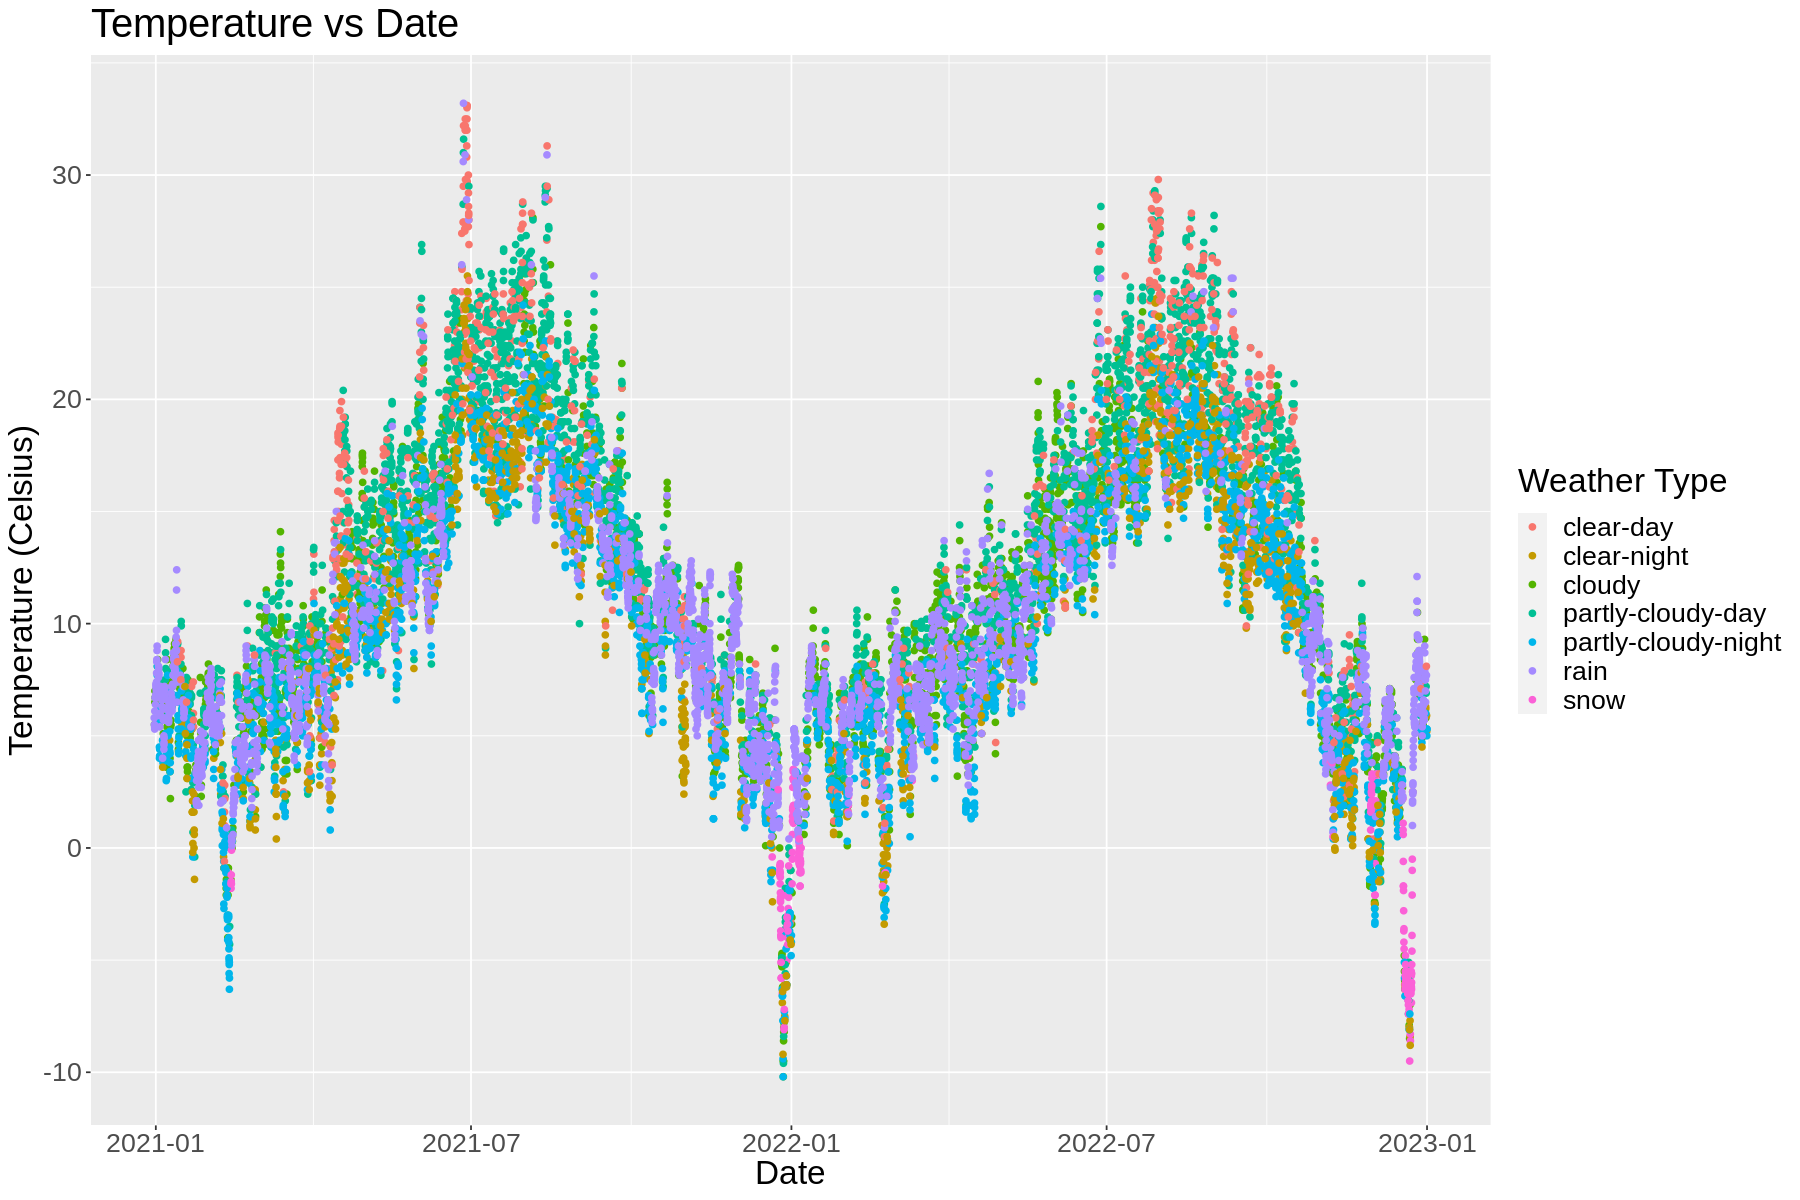

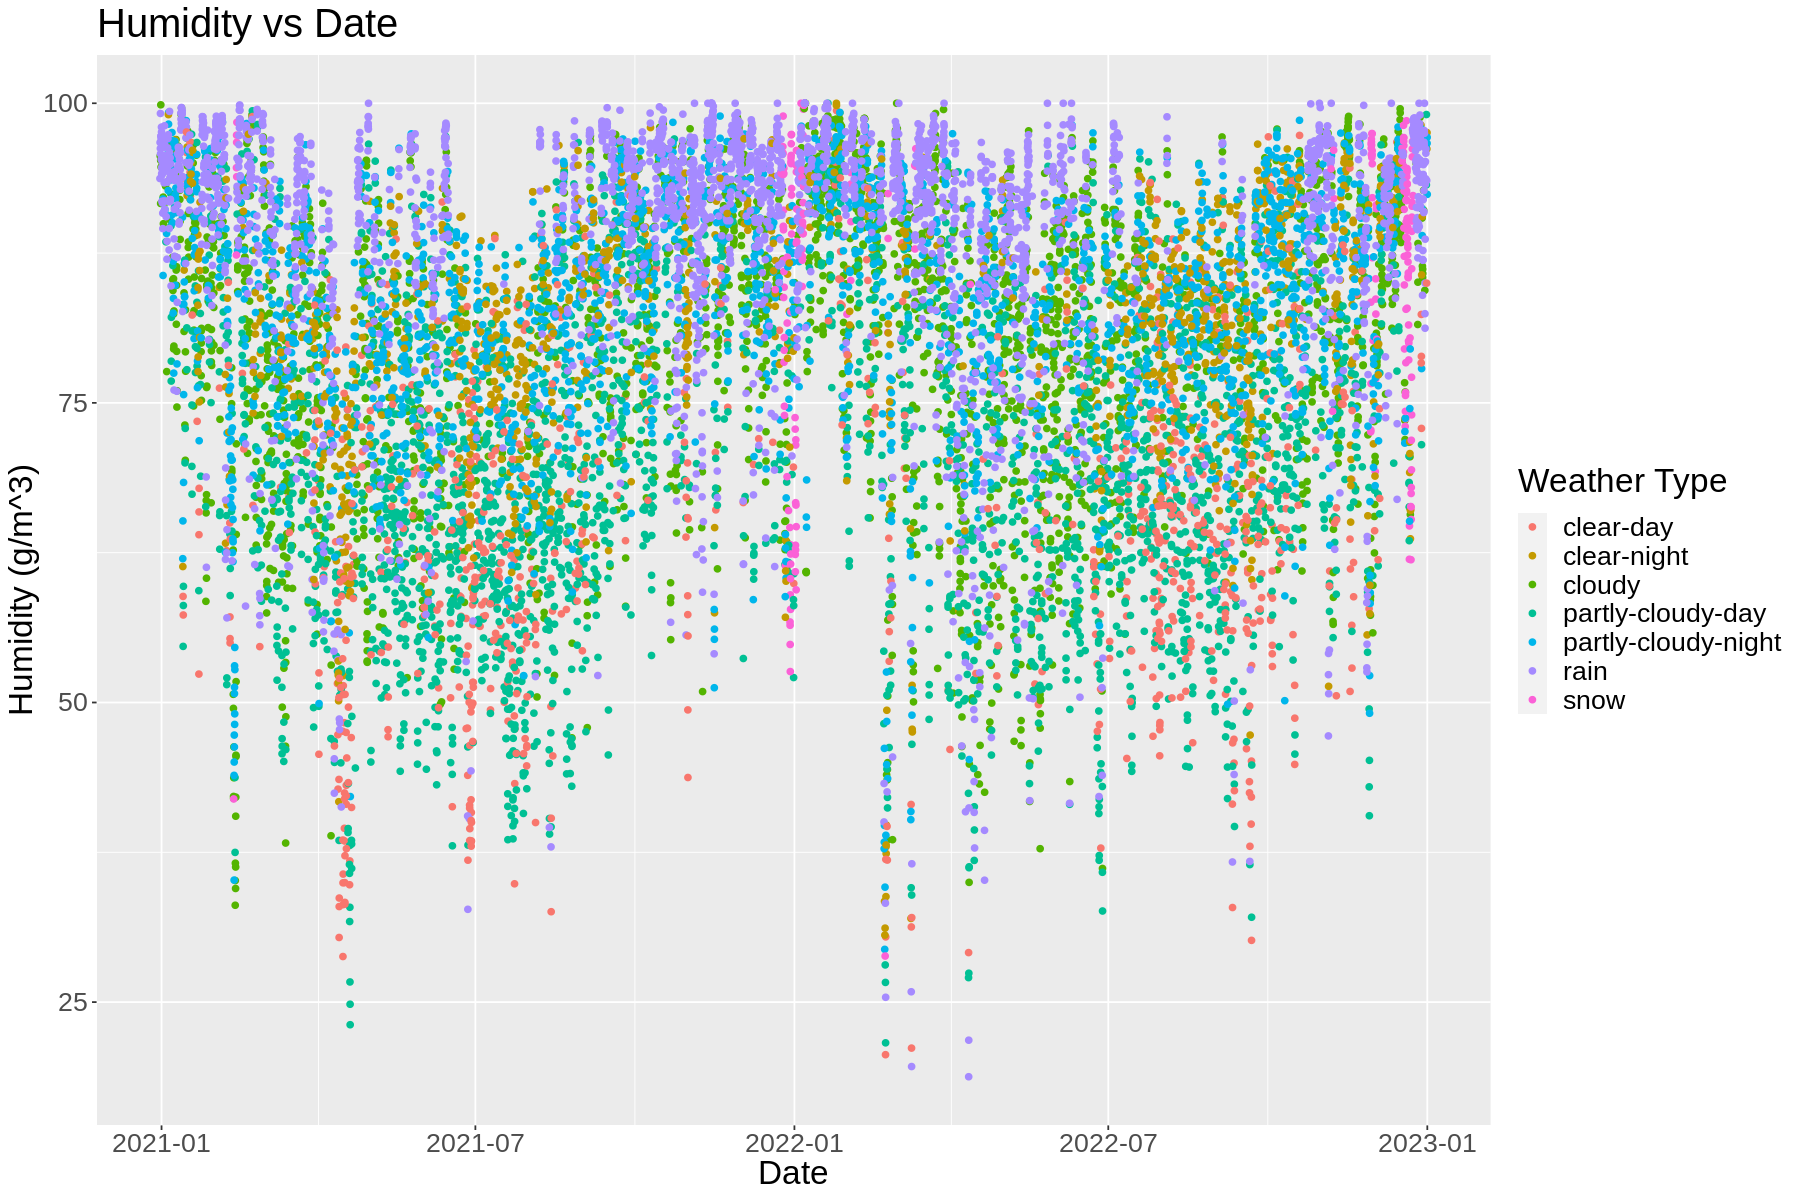

Warning message:
“Removed 1 rows containing missing values (geom_point).”


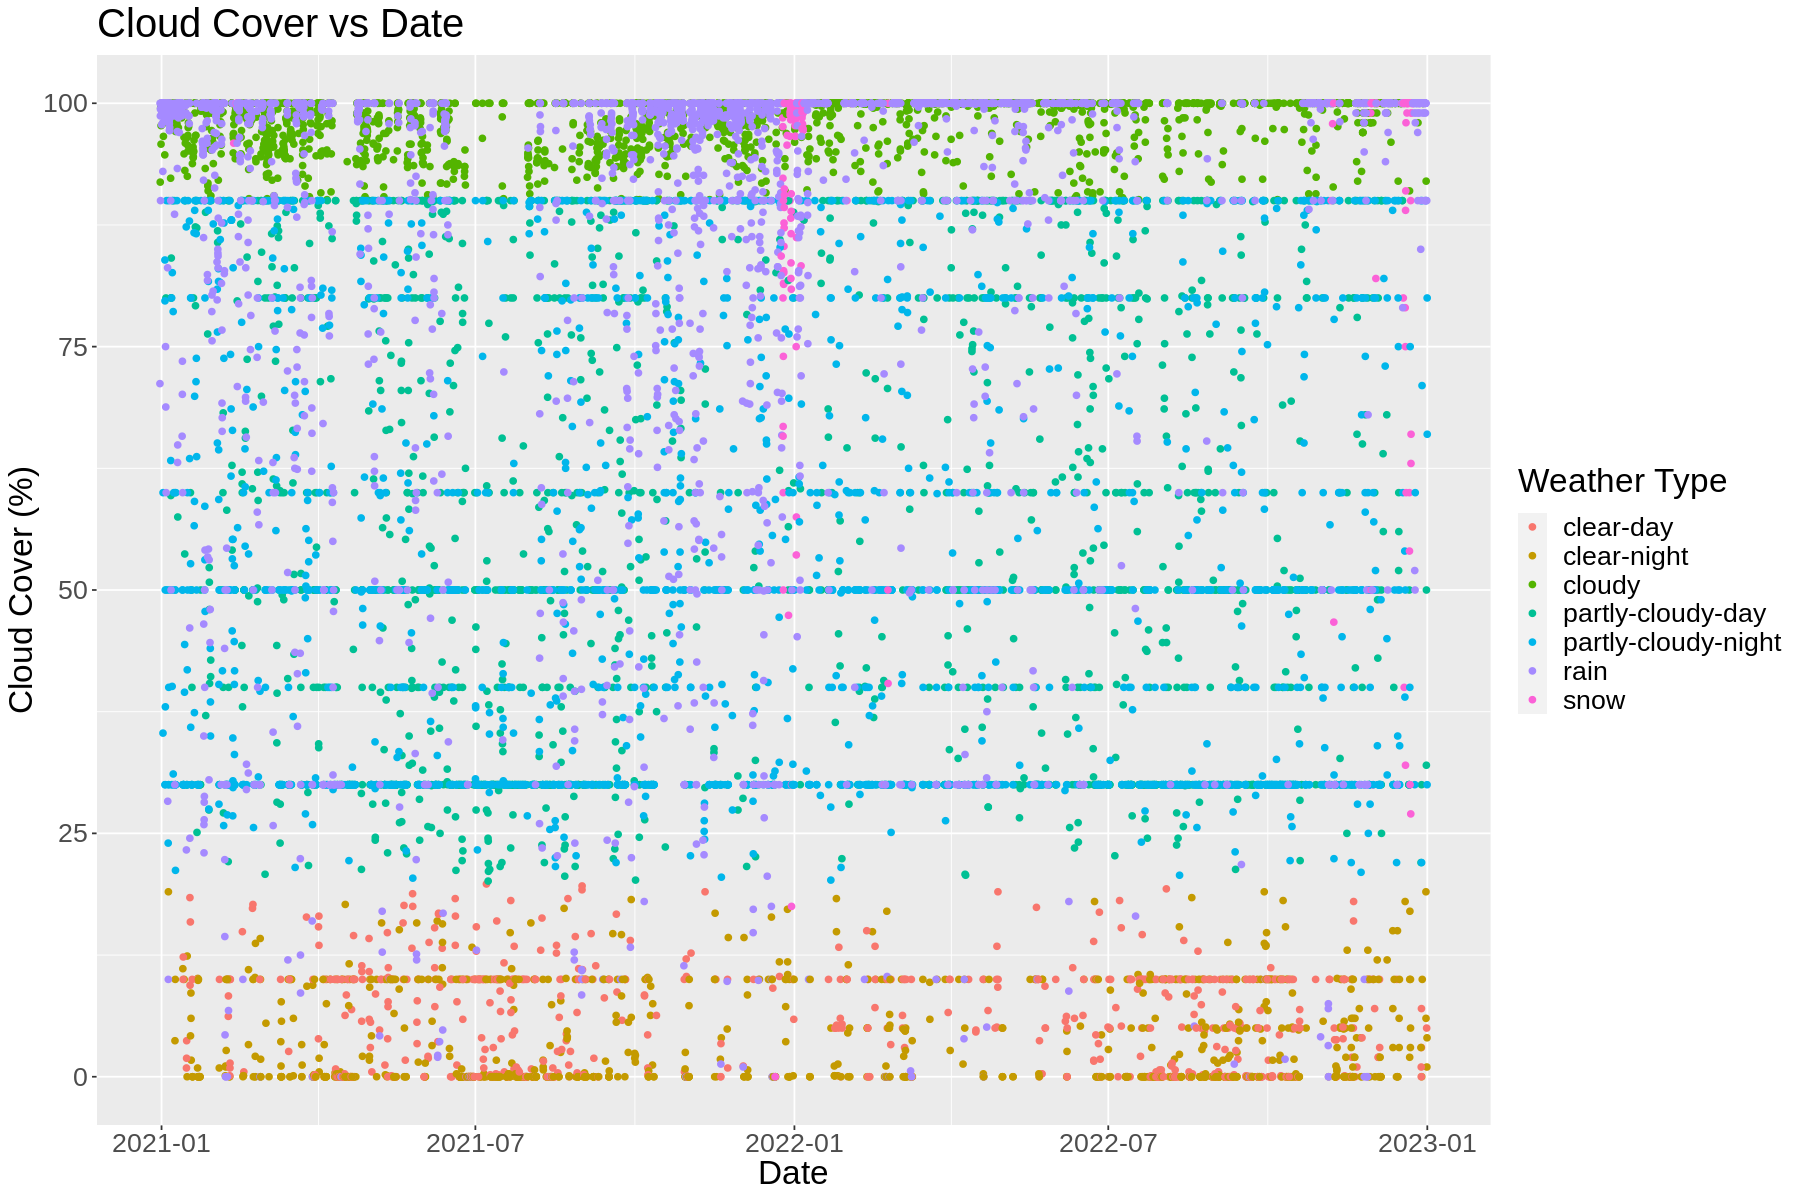

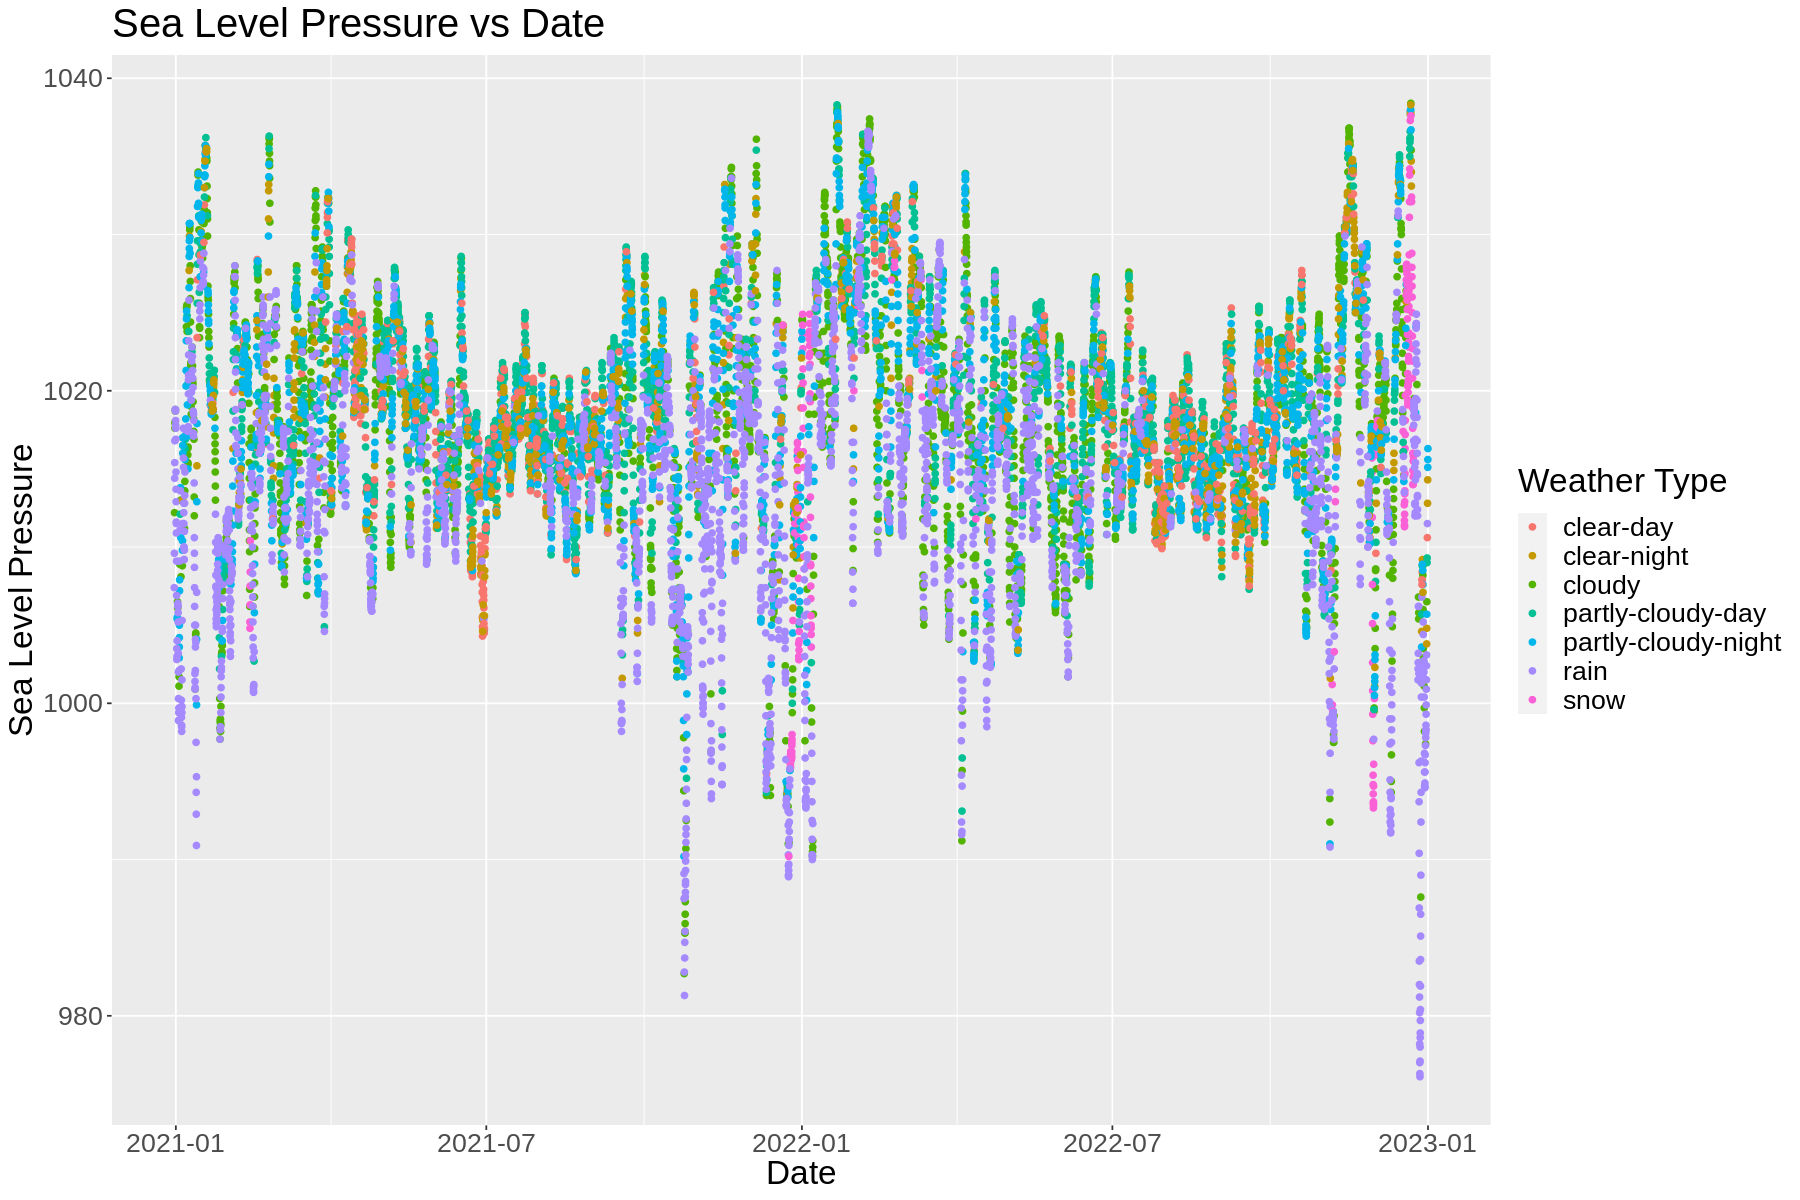

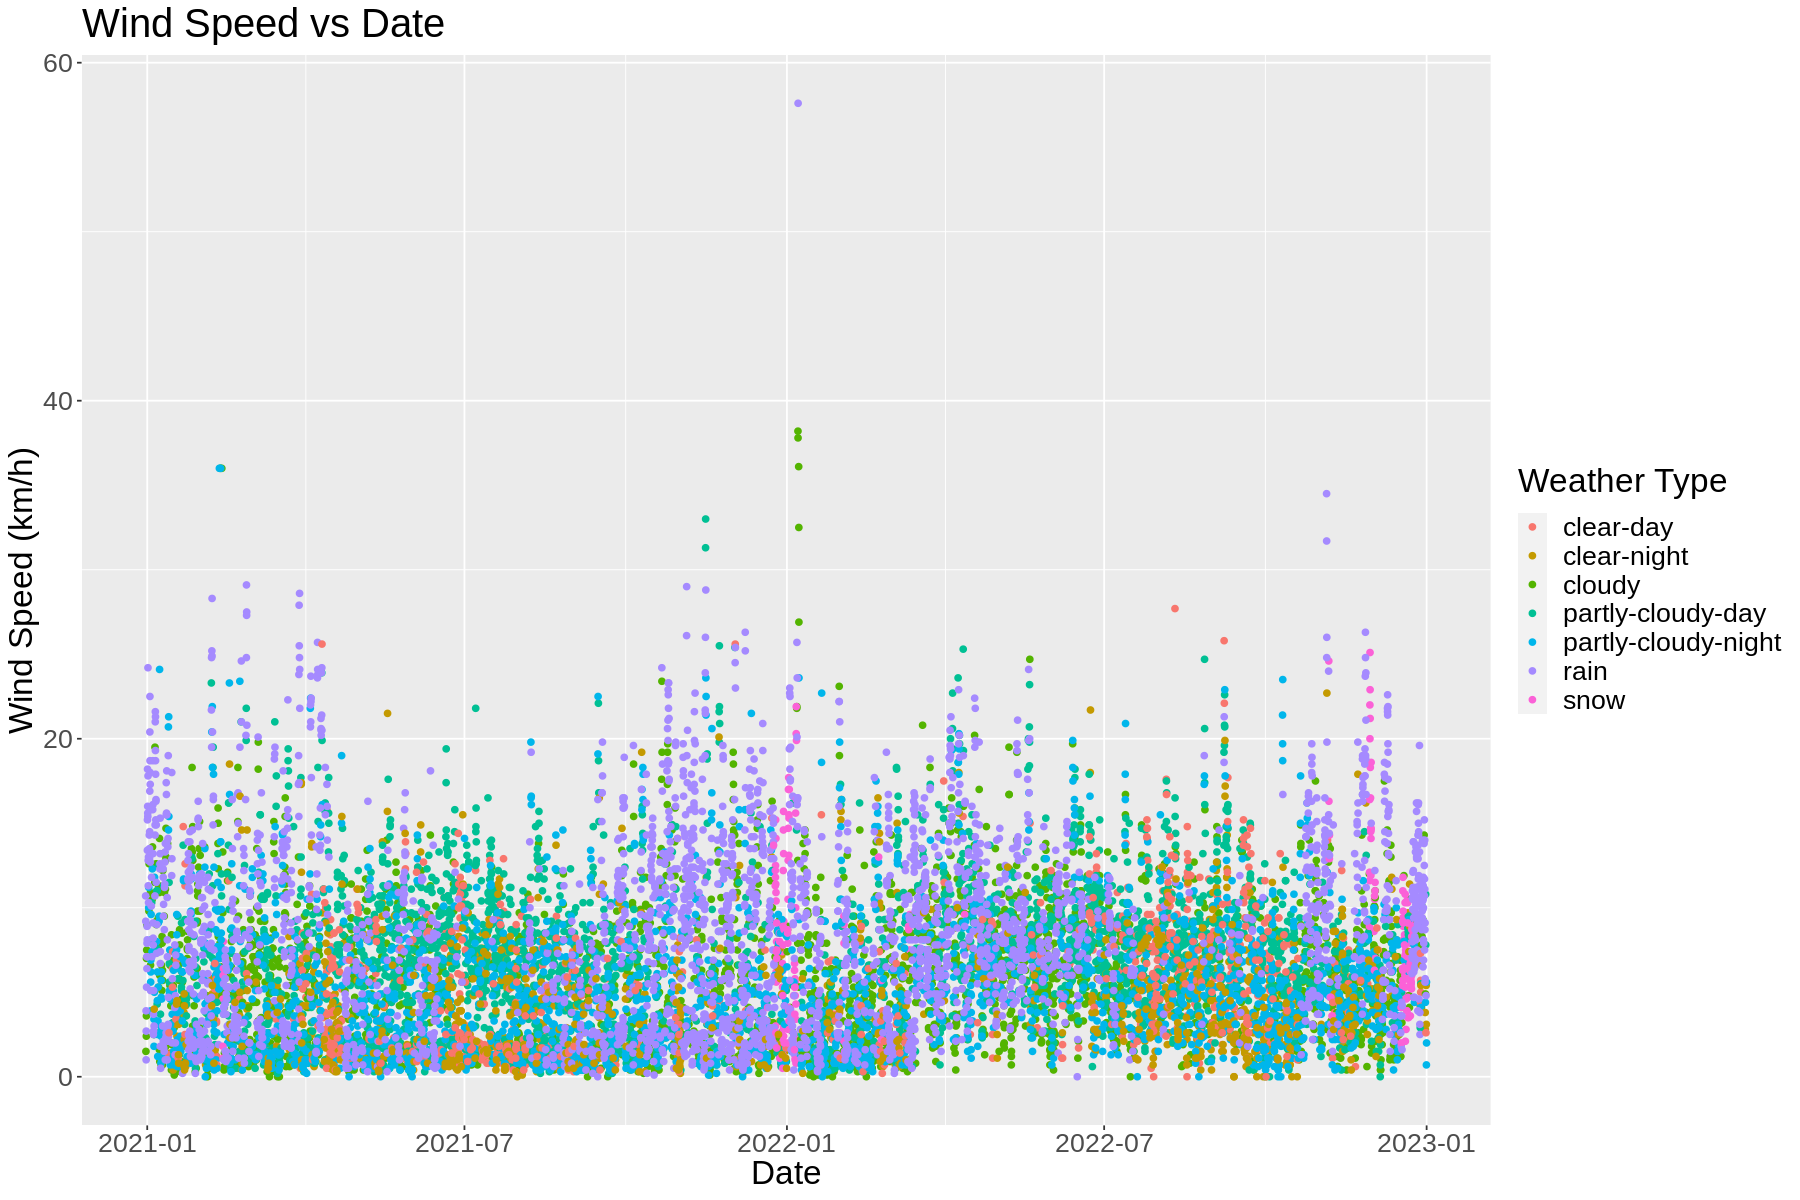

In [6]:
# graph data
options(repr.plot.width = 15, repr.plot.height = 10)

temperature_plot <- weather_training |>
    ggplot(aes(x=datetime, y=temp)) +
    geom_point(aes(color=weather)) +
    labs(x="Date", y="Temperature (Celsius)", color="Weather Type") +
    theme(text = element_text(size=20)) +
    ggtitle("Temperature vs Date")

humidity_plot <- weather_training |>
    ggplot(aes(x=datetime, y=humidity)) +
    geom_point(aes(color=weather)) +
    labs(x="Date", y="Humidity (g/m^3)", color="Weather Type") +
    theme(text = element_text(size=20)) + 
    ggtitle("Humidity vs Date")

cloud_plot <- weather_training |>
    ggplot(aes(x=datetime, y=cloudcover)) +
    geom_point(aes(color=weather)) +
    labs(x="Date", y="Cloud Cover (%)", color="Weather Type") +
    theme(text = element_text(size=20)) +
    ggtitle("Cloud Cover vs Date")

pressure_plot <- weather_training |>
    ggplot(aes(x=datetime, y=sealevelpressure)) +
    geom_point(aes(color=weather)) +
    labs(x="Date", y="Sea Level Pressure", color="Weather Type") +
    theme(text = element_text(size=20)) +
    ggtitle("Sea Level Pressure vs Date")

wind_plot <- weather_training |>
    ggplot(aes(x=datetime, y=windspeed)) +
    geom_point(aes(color=weather)) +
    labs(x="Date", y="Wind Speed (km/h)", color="Weather Type") +
    theme(text = element_text(size=20)) +
    ggtitle("Wind Speed vs Date")



temperature_plot
humidity_plot
cloud_plot
pressure_plot
wind_plot

## Expected outcomes and significance
The expectation is to be able to reasonably predict the type of precipitation on a given day in Vancouver, British Columbia. We believe that although weather can be unpredictable, if some other data indicators are given it may be possible to develop a model for predicting the general weather type for a given day. The impact of the model being successful would be that it could be useful in summarizing the precipitation type of a day using only certain indicators. It can act as a redundant tool or even a general model that can be scaled to let people know the general weather of a day, which can be useful in implementing a weather app for example. This will lead to future questions of how localized the model will be and how feasible it would be for other locations.
